# 📈 Production Quantity Analysis - Deep Dive

This notebook provides detailed comparison of production quantities by:
- **Crop Type**
- **Irrigation System**
- **Combined Analysis** (Crop × Irrigation System)

---

## 1. Setup and Data Loading

In [33]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configure settings
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded successfully!")

✓ Libraries loaded successfully!


In [34]:
# Load dataset
df = pd.read_excel('Irrigation_DS_Clean.xlsx')

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✓ Dataset loaded successfully!
Shape: 30 rows × 55 columns


## 2. Data Preparation

In [35]:
# Verify required columns exist
required_cols = ['Production_Quantity_Baskets_Kg', 'Crop_Type', 'Irrigation_System_Type']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"⚠ Warning: Missing columns: {missing_cols}")
else:
    print("✓ All required columns present!")

# Display sample data
print("\nSample data:")
print("=" * 100)
display(df[['crop_type', 'irrigation_system_type', 'production_quantity_baskets_kg']].head(10))

⚠ Warning: Missing columns: ['Production_Quantity_Baskets_Kg', 'Crop_Type', 'Irrigation_System_Type']

Sample data:


,crop_type,irrigation_system_type,production_quantity_baskets_kg
0,Eggplant,Traditional,120.00
1,Eggplant,Drip,0.00
2,Tomato,Traditional,3200.00
3,Tomato,Drip,800.00
4,pepper,Drip,2000.00
5,pepper,Traditional,860.00
6,pepper,Drip,NaN
7,pepper,Drip,0.00
8,pepper,Traditional,140.00
9,pepper,Traditional,200.00


In [36]:
# Check data quality for production quantity
print("Production Quantity - Data Quality Check:")
print("=" * 100)

prod_col = 'production_quantity_baskets_kg'

if prod_col in df.columns:
    print(f"\nNull values: {df[prod_col].isnull().sum()}")
    print(f"Zero values: {(df[prod_col] == 0).sum()}")
    print(f"Negative values: {(df[prod_col] < 0).sum()}")
    print(f"\nMin value: {df[prod_col].min()}")
    print(f"Max value: {df[prod_col].max()}")
    print(f"Mean value: {df[prod_col].mean():.2f}")
    print(f"Median value: {df[prod_col].median():.2f}")

Production Quantity - Data Quality Check:

Null values: 2
Zero values: 13
Negative values: 0

Min value: 0.0
Max value: 24000.0
Mean value: 1964.46
Median value: 97.50


## 3. Production Quantity by Crop Type

In [37]:
# Statistical summary by crop type
print("PRODUCTION QUANTITY BY CROP TYPE")
print("=" * 100)

if 'crop_type' in df.columns and 'production_quantity_baskets_kg' in df.columns:
    prod_by_crop = df.groupby('crop_type')['production_quantity_baskets_kg'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Total', 'sum')
    ]).round(2)
    
    display(prod_by_crop)
    
    # Save for later use
    prod_by_crop_stats = prod_by_crop

PRODUCTION QUANTITY BY CROP TYPE


,Count,Mean,Median,Std,Min,Max,Total
crop_type,,,,,,,
Eggplant,2,60.00,60.00,84.85,0.00,120.00,120.00
Leafy plant,6,114.17,132.50,66.74,0.00,180.00,685.00
Onion,13,3615.38,0.00,7697.82,0.00,24000.00,47000.00
Tomato,2,2000.00,2000.00,1697.06,800.00,3200.00,4000.00
pepper,5,640.00,200.00,829.34,0.00,2000.00,3200.00


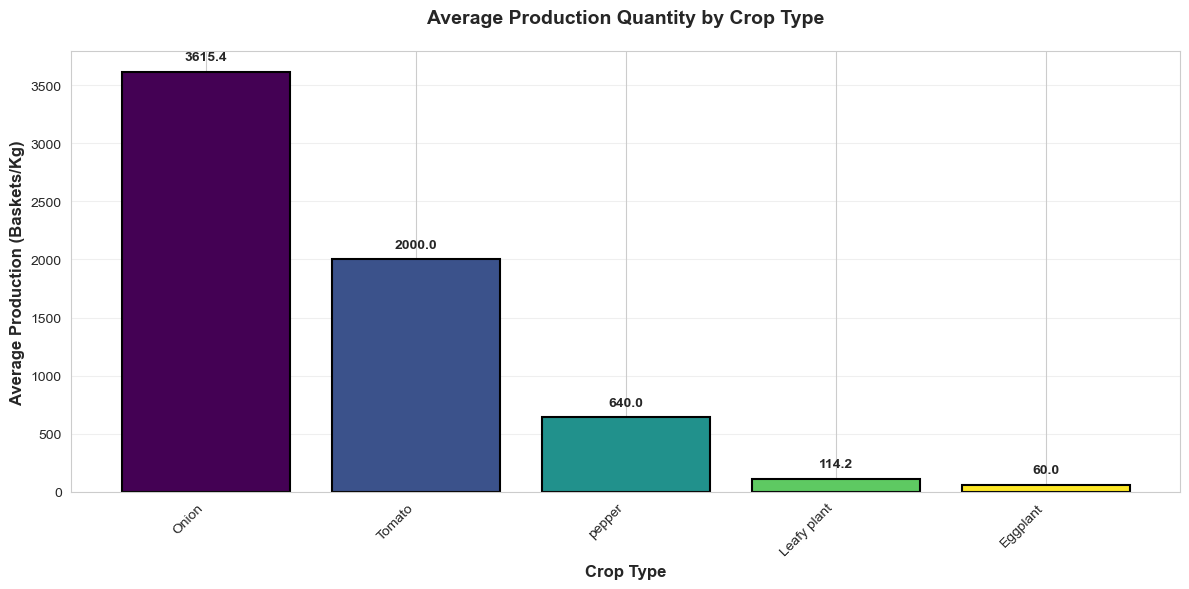


🏆 Highest production: Onion (3615.38 baskets/kg)
📊 Lowest production: Eggplant (60.00 baskets/kg)


In [38]:
# Visualization 1: Average Production by Crop Type
plt.figure(figsize=(12, 6))

crop_avg = df.groupby('crop_type')['production_quantity_baskets_kg'].mean().sort_values(ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(crop_avg)))
bars = plt.bar(range(len(crop_avg)), crop_avg.values, color=colors, edgecolor='black', linewidth=1.5)

plt.xticks(range(len(crop_avg)), crop_avg.index, rotation=45, ha='right')
plt.xlabel('Crop Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Production (Baskets/Kg)', fontsize=12, fontweight='bold')
plt.title('Average Production Quantity by Crop Type', fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, crop_avg.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(crop_avg)*0.02, 
             f'{val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n🏆 Highest production: {crop_avg.index[0]} ({crop_avg.values[0]:.2f} baskets/kg)")
print(f"📊 Lowest production: {crop_avg.index[-1]} ({crop_avg.values[-1]:.2f} baskets/kg)")

<Figure size 1400x700 with 0 Axes>

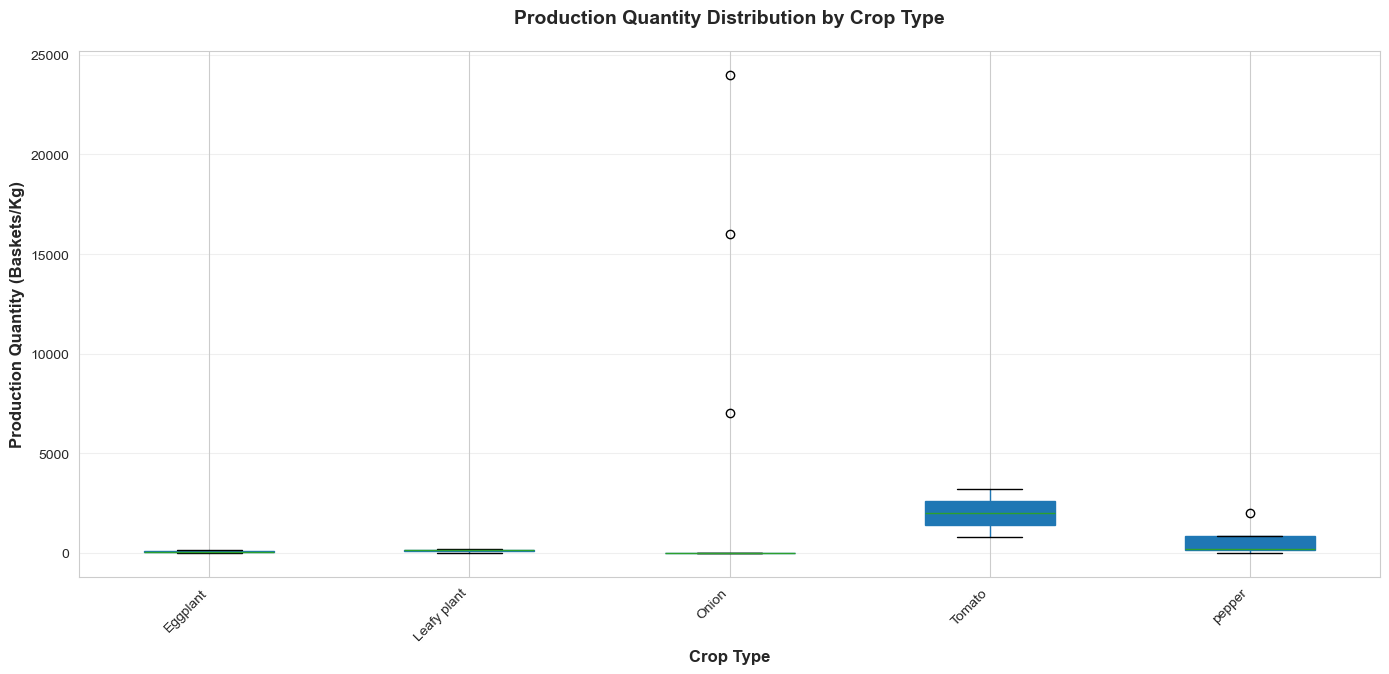

In [39]:
# Visualization 2: Box Plot - Production Distribution by Crop Type
plt.figure(figsize=(14, 7))

df.boxplot(column='production_quantity_baskets_kg', by='crop_type', 
           patch_artist=True, figsize=(14, 7))

plt.suptitle('')  # Remove default title
plt.title('Production Quantity Distribution by Crop Type', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Crop Type', fontsize=12, fontweight='bold')
plt.ylabel('Production Quantity (Baskets/Kg)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

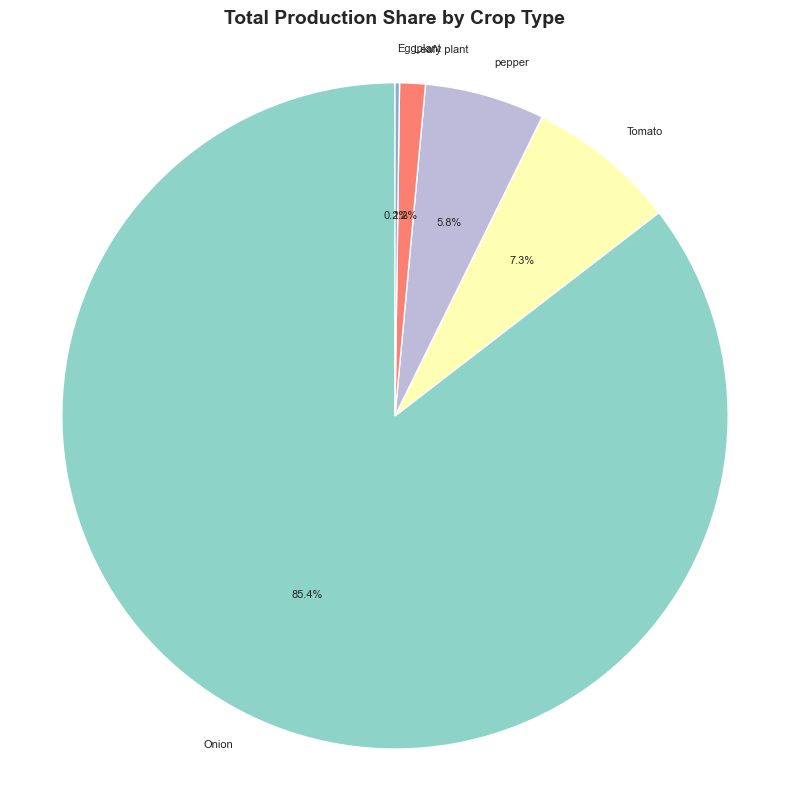


Total Production by Crop:
  • Onion: 47000.00 baskets/kg (85.4%)
  • Tomato: 4000.00 baskets/kg (7.3%)
  • pepper: 3200.00 baskets/kg (5.8%)
  • Leafy plant: 685.00 baskets/kg (1.2%)
  • Eggplant: 120.00 baskets/kg (0.2%)


In [40]:
# Visualization 3: Total Production by Crop Type (Pie Chart)
plt.figure(figsize=(8, 8))

total_prod_by_crop = df.groupby('crop_type')['production_quantity_baskets_kg'].sum().sort_values(ascending=False)

colors = plt.cm.Set3(range(len(total_prod_by_crop)))
plt.pie(total_prod_by_crop.values, labels=total_prod_by_crop.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 8})

plt.title('Total Production Share by Crop Type', fontsize=14, fontweight='bold', pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

print("\nTotal Production by Crop:")
for crop, total in total_prod_by_crop.items():
    pct = (total / total_prod_by_crop.sum()) * 100
    print(f"  • {crop}: {total:.2f} baskets/kg ({pct:.1f}%)")

## 4. Production Quantity by Irrigation System

In [41]:
# Statistical summary by irrigation system
print("PRODUCTION QUANTITY BY IRRIGATION SYSTEM")
print("=" * 100)

if 'irrigation_system_type' in df.columns and 'production_quantity_baskets_kg' in df.columns:
    prod_by_irrigation = df.groupby('irrigation_system_type')['production_quantity_baskets_kg'].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max'),
        ('Total', 'sum')
    ]).round(2)
    
    display(prod_by_irrigation)
    
    # Save for later use
    prod_by_irrigation_stats = prod_by_irrigation

PRODUCTION QUANTITY BY IRRIGATION SYSTEM


,Count,Mean,Median,Std,Min,Max,Total
irrigation_system_type,,,,,,,
Drip,14,224.64,0.00,554.22,0.00,2000.00,3145.00
Traditional,14,3704.29,140.00,7337.94,0.00,24000.00,51860.00


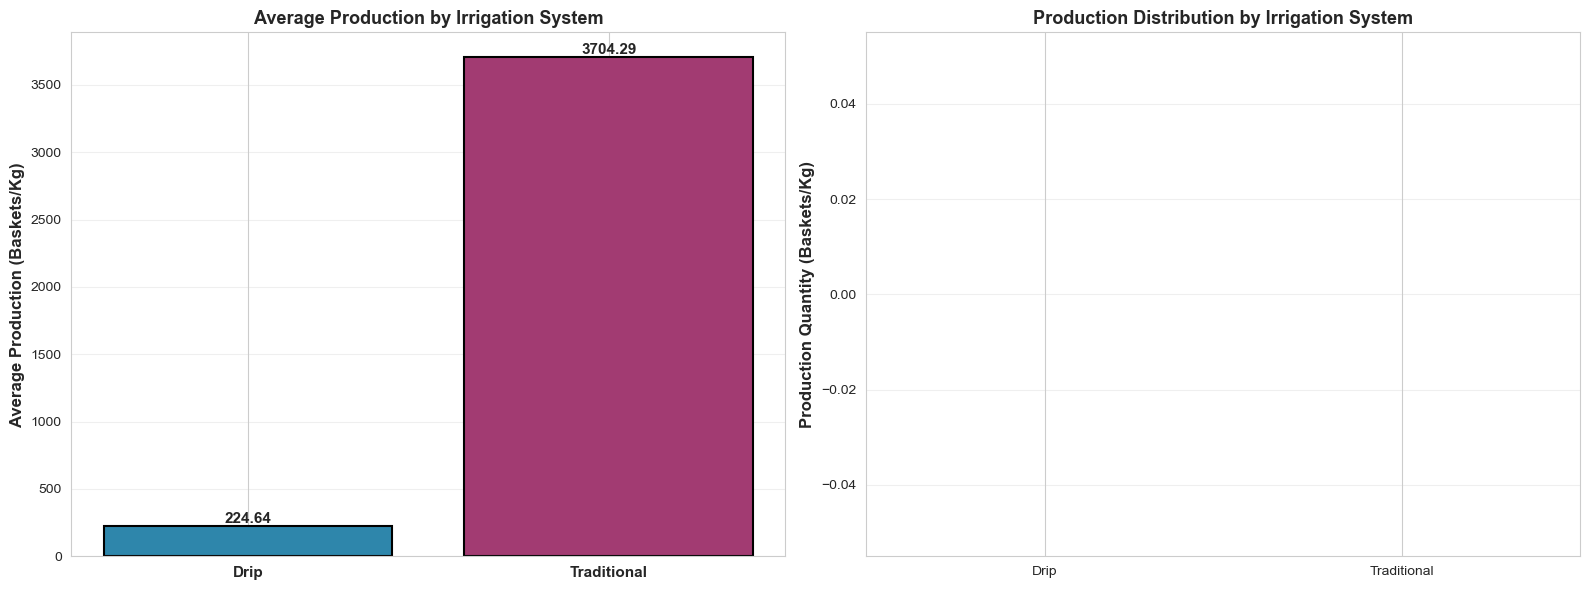


📊 Traditional produces 93.9% more on average


In [42]:
# Visualization 4: Comparison of Production by Irrigation System
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - Average
irrigation_avg = df.groupby('irrigation_system_type')['production_quantity_baskets_kg'].mean()
colors_irr = ['#2E86AB', '#A23B72']

bars1 = axes[0].bar(range(len(irrigation_avg)), irrigation_avg.values, 
                    color=colors_irr, edgecolor='black', linewidth=1.5)
axes[0].set_xticks(range(len(irrigation_avg)))
axes[0].set_xticklabels(irrigation_avg.index, fontsize=11, fontweight='bold')
axes[0].set_ylabel('Average Production (Baskets/Kg)', fontsize=12, fontweight='bold')
axes[0].set_title('Average Production by Irrigation System', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

# Box plot
irrigation_data = [df[df['irrigation_system_type'] == system]['production_quantity_baskets_kg'].values 
                   for system in irrigation_avg.index]

bp = axes[1].boxplot(irrigation_data, labels=irrigation_avg.index, patch_artist=True)
for patch, color in zip(bp['boxes'], colors_irr):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_ylabel('Production Quantity (Baskets/Kg)', fontsize=12, fontweight='bold')
axes[1].set_title('Production Distribution by Irrigation System', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Performance comparison
if len(irrigation_avg) == 2:
    diff = irrigation_avg.values[0] - irrigation_avg.values[1]
    pct_diff = (diff / irrigation_avg.values[1]) * 100
    higher = irrigation_avg.index[0] if diff > 0 else irrigation_avg.index[1]
    print(f"\n📊 {higher} produces {abs(pct_diff):.1f}% more on average")

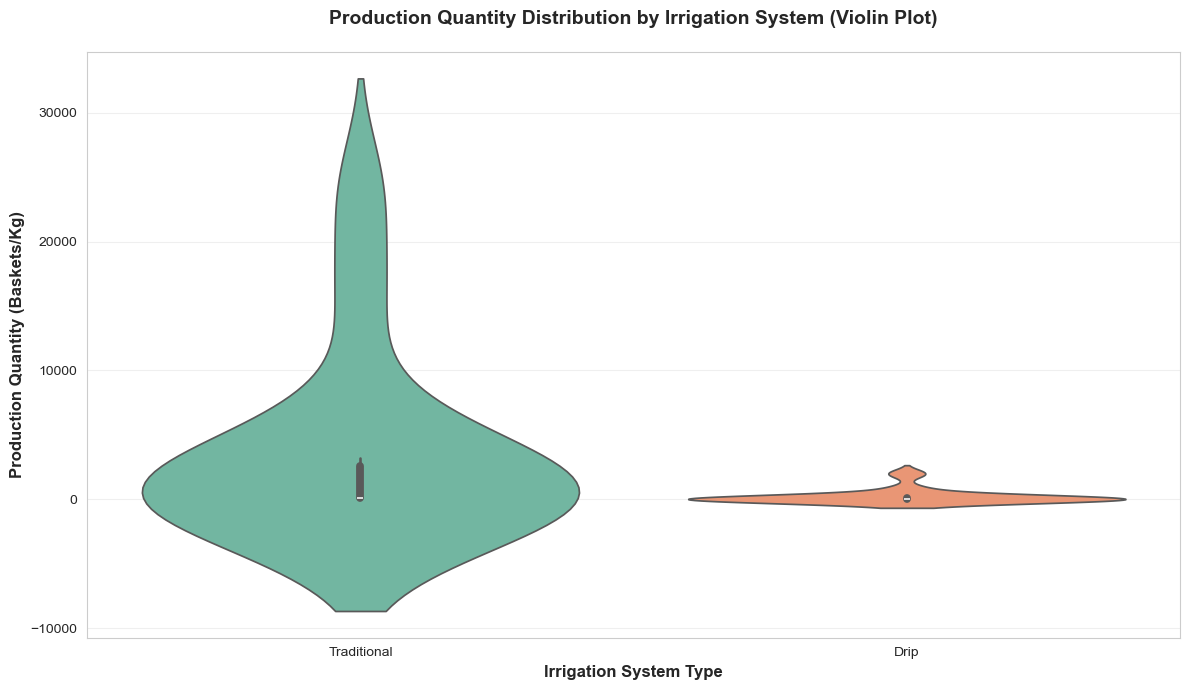

In [43]:
# Visualization 5: Violin Plot - Production by Irrigation System
plt.figure(figsize=(12, 7))

sns.violinplot(data=df, x='irrigation_system_type', y='production_quantity_baskets_kg',
               palette='Set2', inner='box')

plt.xlabel('Irrigation System Type', fontsize=12, fontweight='bold')
plt.ylabel('Production Quantity (Baskets/Kg)', fontsize=12, fontweight='bold')
plt.title('Production Quantity Distribution by Irrigation System (Violin Plot)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Combined Analysis: Crop Type × Irrigation System

In [44]:
# Pivot table: Production by Crop and Irrigation System
print("PRODUCTION QUANTITY: CROP TYPE × IRRIGATION SYSTEM")
print("=" * 100)

pivot_table = df.pivot_table(
    values='production_quantity_baskets_kg',
    index='crop_type',
    columns='irrigation_system_type',
    aggfunc=['mean', 'count', 'sum'],
    margins=True
).round(2)

print("\nAverage Production (Mean):")
display(pivot_table['mean'])

print("\nSample Count:")
display(pivot_table['count'])

print("\nTotal Production (Sum):")
display(pivot_table['sum'])

PRODUCTION QUANTITY: CROP TYPE × IRRIGATION SYSTEM

Average Production (Mean):


irrigation_system_type,Drip,Traditional,All
crop_type,,,
Eggplant,0.00,120.00,60.00
Leafy plant,115.00,113.33,114.17
Onion,0.00,7833.33,3615.38
Tomato,800.00,3200.00,2000.00
pepper,1000.00,400.00,640.00
All,224.64,3704.29,1964.46



Sample Count:


irrigation_system_type,Drip,Traditional,All
crop_type,,,
Eggplant,1,1,2
Leafy plant,3,3,6
Onion,7,6,13
Tomato,1,1,2
pepper,2,3,5
All,14,14,28



Total Production (Sum):


irrigation_system_type,Drip,Traditional,All
crop_type,,,
Eggplant,0.00,120.00,120.00
Leafy plant,345.00,340.00,685.00
Onion,0.00,47000.00,47000.00
Tomato,800.00,3200.00,4000.00
pepper,2000.00,1200.00,3200.00
All,3145.00,51860.00,55005.00


<Figure size 1400x700 with 0 Axes>

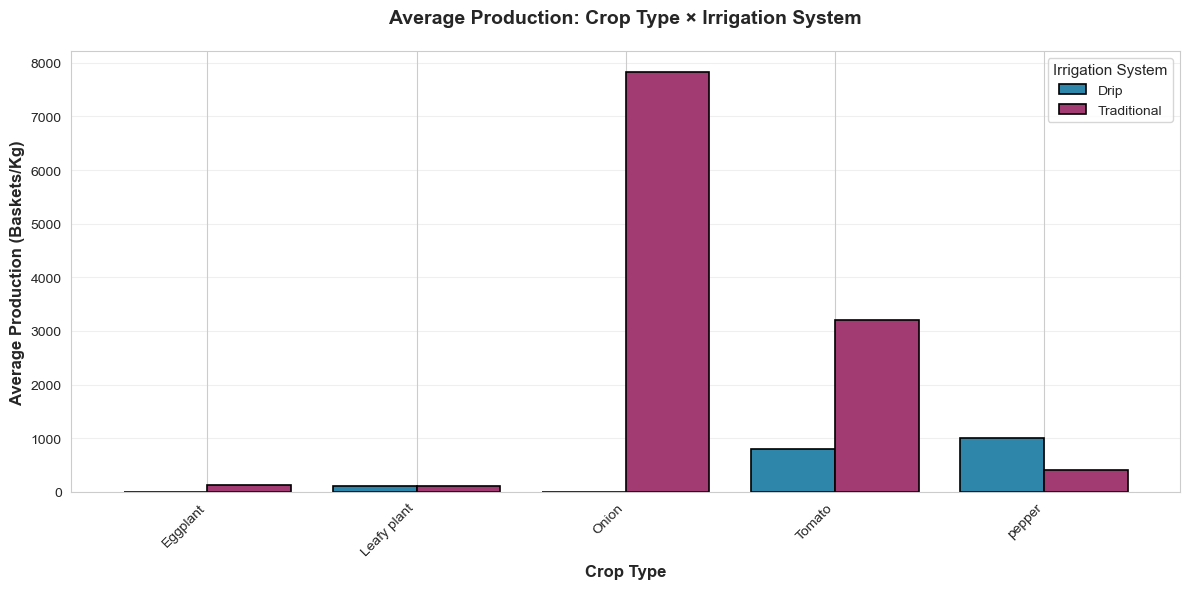

In [45]:
# Visualization 6: Grouped Bar Chart - Crop × Irrigation
pivot_mean = df.pivot_table(
    values='production_quantity_baskets_kg',
    index='crop_type',
    columns='irrigation_system_type',
    aggfunc='mean'
)

plt.figure(figsize=(14, 7))
pivot_mean.plot(kind='bar', color=['#2E86AB', '#A23B72'], 
                edgecolor='black', linewidth=1.2, width=0.8)

plt.xlabel('Crop Type', fontsize=12, fontweight='bold')
plt.ylabel('Average Production (Baskets/Kg)', fontsize=12, fontweight='bold')
plt.title('Average Production: Crop Type × Irrigation System', fontsize=14, fontweight='bold', pad=20)
plt.legend(title='Irrigation System', title_fontsize=11, fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

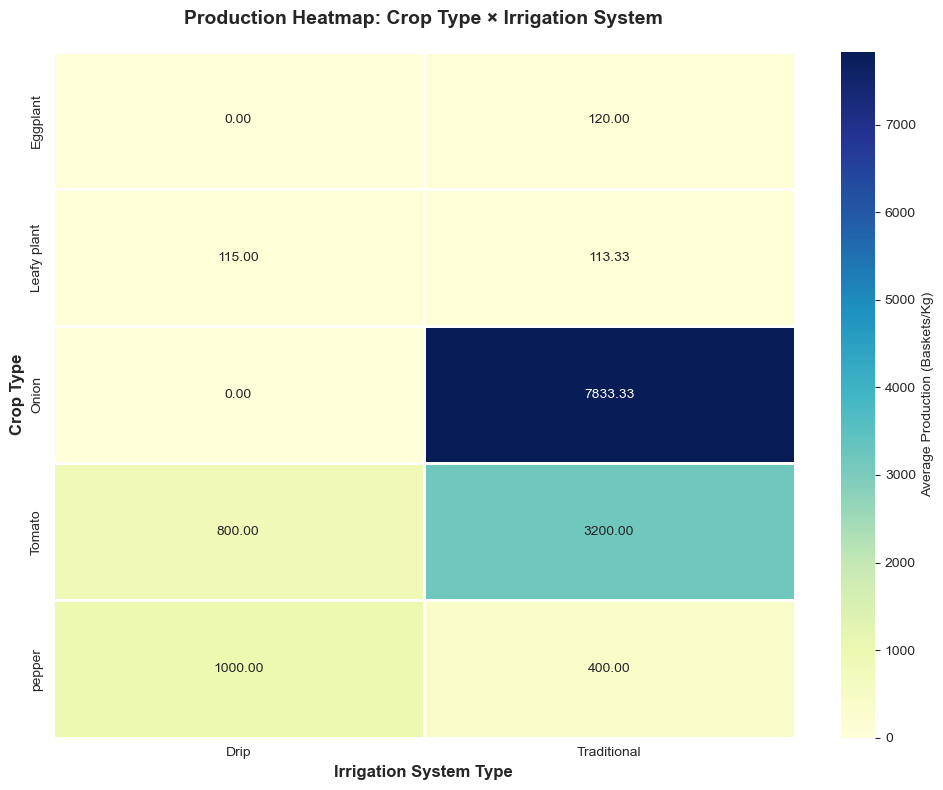

In [46]:
# Visualization 7: Heatmap - Production by Crop and Irrigation
plt.figure(figsize=(10, 8))

sns.heatmap(pivot_mean, annot=True, fmt='.2f', cmap='YlGnBu', 
            cbar_kws={'label': 'Average Production (Baskets/Kg)'},
            linewidths=2, linecolor='white')

plt.xlabel('Irrigation System Type', fontsize=12, fontweight='bold')
plt.ylabel('Crop Type', fontsize=12, fontweight='bold')
plt.title('Production Heatmap: Crop Type × Irrigation System', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

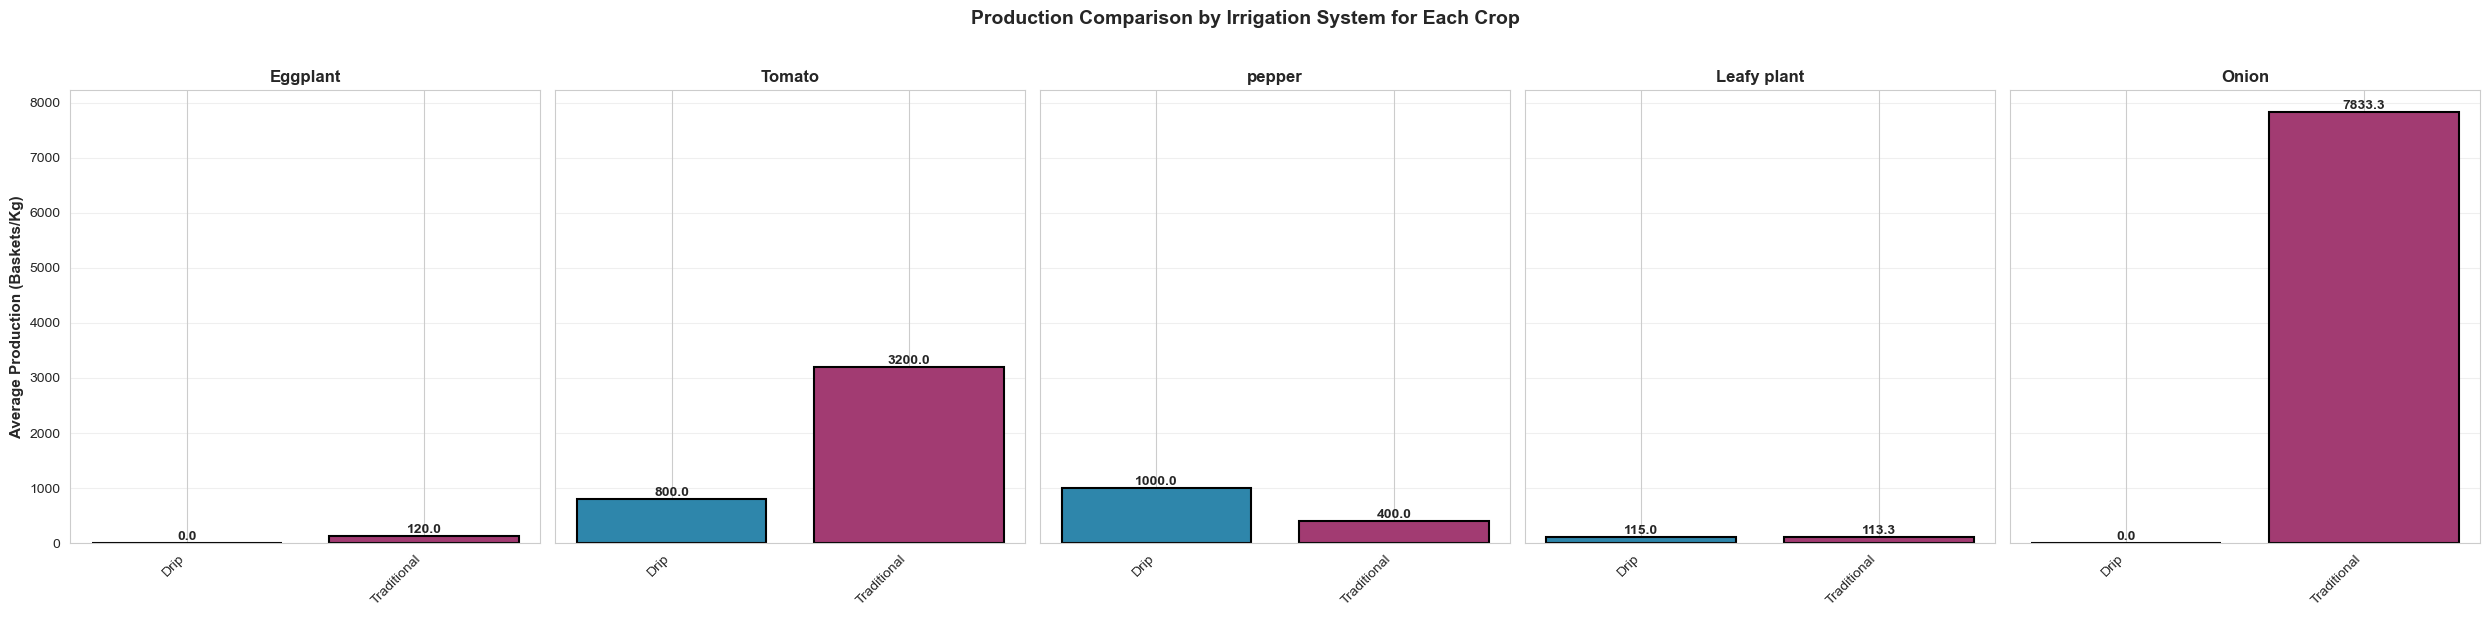

In [47]:
# Visualization 8: Side-by-side comparison for each crop
crops = df['crop_type'].unique()
n_crops = len(crops)

fig, axes = plt.subplots(1, n_crops, figsize=(5*n_crops, 6), sharey=True)

if n_crops == 1:
    axes = [axes]

for idx, crop in enumerate(crops):
    crop_data = df[df['crop_type'] == crop]
    
    prod_by_sys = crop_data.groupby('irrigation_system_type')['production_quantity_baskets_kg'].mean()
    
    colors_crop = ['#2E86AB', '#A23B72']
    bars = axes[idx].bar(range(len(prod_by_sys)), prod_by_sys.values, 
                        color=colors_crop[:len(prod_by_sys)], edgecolor='black', linewidth=1.5)
    
    axes[idx].set_xticks(range(len(prod_by_sys)))
    axes[idx].set_xticklabels(prod_by_sys.index, rotation=45, ha='right')
    axes[idx].set_title(f'{crop}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
    
    if idx == 0:
        axes[idx].set_ylabel('Average Production (Baskets/Kg)', fontsize=11, fontweight='bold')

fig.suptitle('Production Comparison by Irrigation System for Each Crop', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 6. Statistical Tests

In [48]:
# T-test or ANOVA to check if differences are statistically significant
from scipy import stats

print("STATISTICAL SIGNIFICANCE TESTS")
print("=" * 100)

# Test for irrigation systems
if 'irrigation_system_type' in df.columns:
    irrigation_types = df['irrigation_system_type'].unique()
    
    if len(irrigation_types) == 2:
        # T-test for two groups
        group1 = df[df['irrigation_system_type'] == irrigation_types[0]]['production_quantity_baskets_kg'].dropna()
        group2 = df[df['irrigation_system_type'] == irrigation_types[1]]['production_quantity_baskets_kg'].dropna()
        
        t_stat, p_value = stats.ttest_ind(group1, group2)
        
        print(f"\nT-test: Production by Irrigation System")
        print(f"  • {irrigation_types[0]} vs {irrigation_types[1]}")
        print(f"  • t-statistic: {t_stat:.4f}")
        print(f"  • p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print(f"  • ✓ Statistically significant difference (p < 0.05)")
        else:
            print(f"  • No statistically significant difference (p >= 0.05)")

# ANOVA for crop types
if 'Crop_Type' in df.columns:
    crop_groups = [df[df['crop_type'] == crop]['production_quantity_baskets_kg'].dropna() 
                   for crop in df['Crop_Type'].unique()]
    
    if len(crop_groups) > 2:
        f_stat, p_value = stats.f_oneway(*crop_groups)
        
        print(f"\nANOVA: Production by Crop Type")
        print(f"  • F-statistic: {f_stat:.4f}")
        print(f"  • p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print(f"  • ✓ Statistically significant difference between crops (p < 0.05)")
        else:
            print(f"  • No statistically significant difference between crops (p >= 0.05)")

STATISTICAL SIGNIFICANCE TESTS

T-test: Production by Irrigation System
  • Traditional vs Drip
  • t-statistic: 1.7692
  • p-value: 0.0886
  • No statistically significant difference (p >= 0.05)


## 7. Key Findings Summary

In [49]:
print("=" * 100)
print("KEY FINDINGS: PRODUCTION QUANTITY ANALYSIS")
print("=" * 100)

# By Crop Type
print("\n📊 BY CROP TYPE:")
print("-" * 100)

crop_avg = df.groupby('crop_type')['production_quantity_baskets_kg'].mean().sort_values(ascending=False)
print(f"\n🏆 Highest producing crop: {crop_avg.index[0]}")
print(f"   Average production: {crop_avg.values[0]:.2f} baskets/kg")

print(f"\n📉 Lowest producing crop: {crop_avg.index[-1]}")
print(f"   Average production: {crop_avg.values[-1]:.2f} baskets/kg")

print(f"\nProduction range: {crop_avg.values[-1]:.2f} - {crop_avg.values[0]:.2f} baskets/kg")
print(f"Difference: {(crop_avg.values[0] - crop_avg.values[-1]):.2f} baskets/kg ({((crop_avg.values[0] / crop_avg.values[-1] - 1) * 100):.1f}% higher)")

# By Irrigation System
print("\n💧 BY IRRIGATION SYSTEM:")
print("-" * 100)

irr_avg = df.groupby('irrigation_system_type')['production_quantity_baskets_kg'].mean().sort_values(ascending=False)

for i, (system, avg_prod) in enumerate(irr_avg.items(), 1):
    count = df[df['irrigation_system_type'] == system].shape[0]
    print(f"\n{i}. {system}:")
    print(f"   Average production: {avg_prod:.2f} baskets/kg")
    print(f"   Number of farms: {count}")

if len(irr_avg) == 2:
    diff = irr_avg.values[0] - irr_avg.values[1]
    pct_diff = (diff / irr_avg.values[1]) * 100
    print(f"\nPerformance difference: {abs(pct_diff):.1f}%")
    print(f"{irr_avg.index[0]} produces {abs(diff):.2f} more baskets/kg on average")

# Best combination
print("\n🌟 BEST COMBINATION:")
print("-" * 100)

combo_avg = df.groupby(['crop_type', 'irrigation_system_type'])['production_quantity_baskets_kg'].mean().sort_values(ascending=False)

if len(combo_avg) > 0:
    best_combo = combo_avg.index[0]
    best_prod = combo_avg.values[0]
    print(f"\nCrop: {best_combo[0]}")
    print(f"Irrigation: {best_combo[1]}")
    print(f"Average production: {best_prod:.2f} baskets/kg")

print("\n" + "=" * 100)

KEY FINDINGS: PRODUCTION QUANTITY ANALYSIS

📊 BY CROP TYPE:
----------------------------------------------------------------------------------------------------

🏆 Highest producing crop: Onion
   Average production: 3615.38 baskets/kg

📉 Lowest producing crop: Eggplant
   Average production: 60.00 baskets/kg

Production range: 60.00 - 3615.38 baskets/kg
Difference: 3555.38 baskets/kg (5925.6% higher)

💧 BY IRRIGATION SYSTEM:
----------------------------------------------------------------------------------------------------

1. Traditional:
   Average production: 3704.29 baskets/kg
   Number of farms: 15

2. Drip:
   Average production: 224.64 baskets/kg
   Number of farms: 15

Performance difference: 1549.0%
Traditional produces 3479.64 more baskets/kg on average

🌟 BEST COMBINATION:
----------------------------------------------------------------------------------------------------

Crop: Onion
Irrigation: Traditional
Average production: 7833.33 baskets/kg



## 8. Recommendations

### 📌 Based on the Production Quantity Analysis:

#### 🎯 Crop Selection
- Focus on **high-producing crops** identified in the analysis
- Consider market demand alongside production capacity
- Diversify with a mix of high and medium producers

#### 💧 Irrigation System Optimization
- If one system shows significantly higher production:
  - Evaluate cost-benefit of adopting that system
  - Consider water availability and infrastructure costs
  - Provide training/support for farmers to switch systems

#### 🔄 Crop-Irrigation Matching
- Use the **best combinations** identified in the analysis
- Match specific crops with their optimal irrigation system
- Create crop-specific irrigation guidelines

#### 📊 Further Analysis Needed
- Cost-per-kg analysis (production quantity vs total costs)
- Profitability analysis (production × market price − costs)
- Water efficiency (production per liter of water used)
- Time-based trends if multi-season data available

---

**End of Production Quantity Analysis** 🎉